##### Tuesday the 17th of September, 2024
# A CNN for Image Classification With Conv2D and MaxPooling2D
---

## Introduction
### Background

The current state of image classification models is fueled by advancements in deep learning (e.g., convolutional neural networks (CNNs)) which have set new performance benchmarks. Pretrained models and transfer learning allow companies to leverage large-scale models without needing vast labeled datasets, while self-supervised learning further reduces the dependence on annotations. Consequently, their use has quickly grown and spread into a number of industries including manufacturing, healthcare, retail, and security.

For companies, image classification offers significant value by automating visual tasks, reducing costs, improving accuracy, and enhancing customer experiences. By integrating image classification, companies can scale operations, improve personalization, and innovate in areas like autonomous vehicles and smart technologies, ultimately boosting their competitiveness and growth.

### Objective

The goal of this project is to develop an effective image classification model using a Conv2D and MaxPooling2D-based convolutional neural network.

----
## Dataset description

In this project, we will use the [CIFAR-10](https://www.cs.toronto.edu/~kriz/cifar.html) dataset—a well-known data collection for image classification, constituting 60,000 32x32 color images in 10 classes, with 6,000 images per class. The dataset contains a total of 50,000 training images and 10,000 test images.

The image classes are as follows:
1. Airplane
2. Automobile
3. Bird
4. Cat
5. Deer
6. Dog
7. Frog
8. Horse
9. Ship
10. Truck

---
## Import Python Modules

First, we import the libraries/modules that will be used in this project:

- Pandas
- Matplotlib
- Seaborn
- TensorFlow
- random

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow import keras
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
import random

---
## Load the Data

Let's start by loading the dataset using the `cifar10` module

In [2]:
# Load dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Print data shapes
print("Training data shape:", x_train.shape)
print("Test data shape:", x_test.shape)

Training data shape: (50000, 32, 32, 3)
Test data shape: (10000, 32, 32, 3)


Let's have a look at a few example images from the dataset. We will use the `random.randint()` function to randomly return 8 of the 50,000 training images.

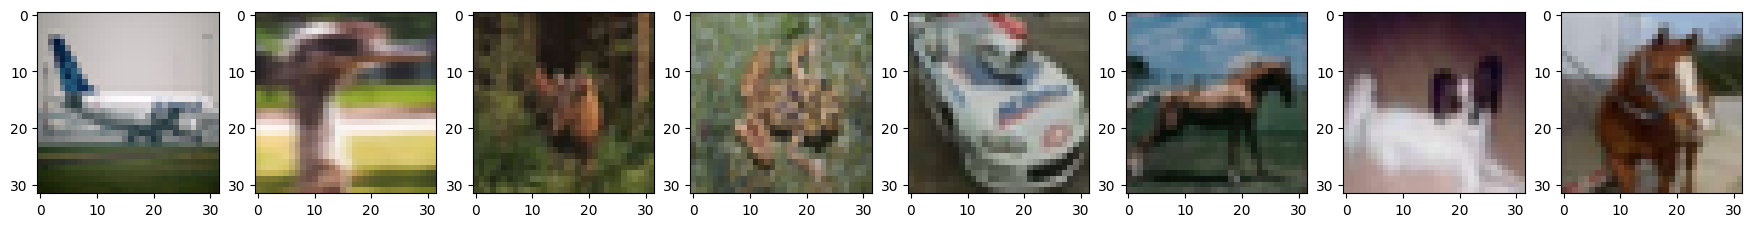

In [3]:
## Let's look at a few of the images
fig, (axs) = plt.subplots(1, 8, figsize=(22, 5))

for ax in axs:
    ax.imshow(x_train[random.randint(0, 50000)])

Although pixelated, we can with relative certainty, discern that the images above depict a bird, a dog, an automobile, a cat, an airplane, a deer, a ship, and a dog.

---
## Data Preprocessing

Our simple data preprocessing consists of firstly changing the image classes from integers ranging from 0-9 to vectors with a 1 in the X<sup>th</sup> position. Then, we change the training and test dataframe data types to float and scale our data so that each entry occupies a single byte of memory.

In [4]:
# Set number of classes
n_classes = 10

# Change classes from 0-9 integer to vectors with a 1 in the Xth position
y_train = keras.utils.to_categorical(y_train, n_classes)
y_test = keras.utils.to_categorical(y_test, n_classes)

In [5]:
# Change data type to float
x_train = x_train.astype("float32")
x_test = x_test.astype("float32")

# Scale data to byte size
x_train = x_train / 255
x_test = x_test / 255

---
## Model Development
We will develop, train, and test three CNN models—each with increasing depth and a greater number of layers and parameters. Each model's performance will then be compared and discussed.


### First Model
Below we will build our initial CNN model. As it is our first model, it has relatively few parameters and is the least deep of the three models. The model begins with two 5x5 Conv2D layers with strides of 2 and 32 filters each, followed by a MaxPooling layer. Finally, the model is flattened, followed by a single fully-connected layer and then the final classification layer. The structure can be summarized as follows:

*Conv2D → Conv2D → MaxPooling → Flatten → Dense → Final Classification*

In [6]:
# Begin building CNN with Keras Sequential() class
M1 = Sequential()

# 5x5 Conv2D with 2x2 stride and 32 filters
M1.add(
    Conv2D(
        32,
        (5, 5),
        strides=(2, 2),
        padding="same",
        activation="relu",
        input_shape=x_train.shape[1:]
    )
)

# 5x5 Conv2D with 2x2 stride and 32 filters
M1.add(Conv2D(32, (5, 5), strides=(2, 2), padding="same", activation="relu"))
# 2x2 MaxPooling reduces dimensions to 4x4x32
M1.add(MaxPooling2D((2,2), padding='same'))
M1.add(Dropout(0.25))

# Flatten turns 4x4x32 into 512x1
M1.add(Flatten())
M1.add(Dense(512, activation="relu"))
M1.add(Dropout(0.5))
M1.add(Dense(n_classes, activation="softmax"))

M1.summary()

c:\Users\noah8\AppData\Local\Python\Python3.11\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 16, 16, 32)     │         2,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 8, 8, 32)       │        25,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 4, 4, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 4, 4, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 295,850 (1.13 MB)

 Trainable params: 295,850 (1.13 MB)

 Non-trainable params: 0 (0.00 B)

This is considered a small model despite the 181,000+ parameters present!

In [7]:
# Set parameters
batch_size = 40
n_epochs = 10
learning_rate = 0.0005

In [8]:
# Initialize RMSprop optimizer
opt = keras.optimizers.RMSprop(learning_rate=learning_rate)

# Train model using RMSprop
M1.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

# Train for 10 epochs
M1_fit = M1.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=n_epochs,
    validation_data=(x_test, y_test),
    shuffle=True,
)

Epoch 1/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.2914 - loss: 1.9215 - val_accuracy: 0.5061 - val_loss: 1.4018
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.4761 - loss: 1.4505 - val_accuracy: 0.5433 - val_loss: 1.2634
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.5347 - loss: 1.3107 - val_accuracy: 0.5628 - val_loss: 1.2024
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.5663 - loss: 1.2288 - val_accuracy: 0.6061 - val_loss: 1.1127
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.5839 - loss: 1.1808 - val_accuracy: 0.6009 - val_loss: 1.1271
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6011 - loss: 1.1343 - val_accuracy: 0.6271 - val_loss: 1.0648
Epoch 7/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6142 - loss: 1.1065 - val_accuracy: 0.6359 - val_loss: 1.0411
Epoch 8/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6214 - loss: 1.0836 - 

### Second Model
Next, we will build our second CNN model. We will follow the same general structure as the initial model; however, the second Conv2D layer will now have 64 filters, increasing the depth of the model.


In [9]:
# Begin building CNN with Keras Sequential() class
M2 = Sequential()

# 5x5 Conv2D with 2x2 stride and 32 filters
M2.add(
    Conv2D(
        32,
        (5, 5),
        strides=(2, 2),
        padding="same",
        activation="relu",
        input_shape=x_train.shape[1:],
    )
)

# 5x5 Conv2D with 2x2 stride and 64 filters
M2.add(Conv2D(64, (5, 5), strides=(2, 2), padding="same", activation="relu"))
# 2x2 MaxPooling reduces dimensions to 1x1x64
M2.add(MaxPooling2D((2,2), padding='same'))
M2.add(Dropout(0.25))

# Flatten turns 1x1x64 into 64x1
M2.add(Flatten())
M2.add(Dense(512, activation="relu"))
M2.add(Dropout(0.5))
M2.add(Dense(n_classes, activation="softmax"))

# Check number of parameters
M2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 16, 16, 32)     │         2,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 8, 8, 64)       │        51,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 4, 4, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 4, 4, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 583,626 (2.23 MB)

 Trainable params: 583,626 (2.23 MB)

 Non-trainable params: 0 (0.00 B)

In [10]:
# Initialize RMSprop optimizer
opt_2 = keras.optimizers.RMSprop(learning_rate=learning_rate)

# Train model using RMSprop
M2.compile(loss="categorical_crossentropy", optimizer=opt_2, metrics=["accuracy"])

# Train for 10 epochs
M2_fit = M2.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=n_epochs,
    validation_data=(x_test, y_test),
    shuffle=True,
)

Epoch 1/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.3104 - loss: 1.8815 - val_accuracy: 0.5180 - val_loss: 1.3581
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.5032 - loss: 1.3903 - val_accuracy: 0.5641 - val_loss: 1.2190
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.5656 - loss: 1.2322 - val_accuracy: 0.6022 - val_loss: 1.1267
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.5967 - loss: 1.1423 - val_accuracy: 0.6256 - val_loss: 1.0629
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.6221 - loss: 1.0770 - val_accuracy: 0.6318 - val_loss: 1.0430
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.6341 - loss: 1.0310 - val_accuracy: 0.6481 - val_loss: 1.0090
Epoch 7/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.6544 - loss: 0.9877 - val_accuracy: 0.6571 - val_loss: 1.0034
Epoch 8/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.6703 - loss: 0.9573 - 

### Third Model
Our third and final model will have the same structure as the first and second; however, this time the second Conv2D layer will have 128 filters:


In [11]:
# Begin building CNN with Keras Sequential() class
M3 = Sequential()

# 5x5 Conv2D with 2x2 stride and 32 filters
M3.add(
    Conv2D(
        32,
        (5, 5),
        strides=(2, 2),
        padding="same",
        activation="relu",
        input_shape=x_train.shape[1:],
    )
)

# 5x5 Conv2D with 2x2 stride and 128 filters
M3.add(Conv2D(128, (5, 5), strides=(2, 2), padding="same", activation="relu"))
# 2x2 MaxPooling reduces dimensions to 1x1x128
M3.add(MaxPooling2D((2,2), padding='same'))
M3.add(Dropout(0.25))

# Flatten turns 1x1x128 into 128x0
M3.add(Flatten())
M3.add(Dense(512, activation="relu"))
M3.add(Dropout(0.5))
M3.add(Dense(n_classes, activation="softmax"))

# Check number of parameters
M3.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 16, 16, 32)     │         2,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 8, 8, 128)      │       102,528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 512)            │     1,049,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,159,178 (4.42 MB)

 Trainable params: 1,159,178 (4.42 MB)

 Non-trainable params: 0 (0.00 B)

In [12]:
# Initialize RMSprop optimizer
opt_3 = keras.optimizers.RMSprop(learning_rate=learning_rate)

# Train model using RMSprop
M3.compile(loss="categorical_crossentropy", optimizer=opt_3, metrics=["accuracy"])

# Train for 10 epochs
M3_fit = M3.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=n_epochs,
    validation_data=(x_test, y_test),
    shuffle=True,
)

Epoch 1/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.3360 - loss: 1.8296 - val_accuracy: 0.5433 - val_loss: 1.3034
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.5420 - loss: 1.3021 - val_accuracy: 0.5948 - val_loss: 1.1422
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.6019 - loss: 1.1374 - val_accuracy: 0.6118 - val_loss: 1.1019
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.6318 - loss: 1.0471 - val_accuracy: 0.6565 - val_loss: 0.9722
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.6620 - loss: 0.9713 - val_accuracy: 0.6738 - val_loss: 0.9367
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.6748 - loss: 0.9276 - val_accuracy: 0.6692 - val_loss: 0.9628
Epoch 7/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 12s 10ms/step - accuracy: 0.6975 - loss: 0.8795 - val_accuracy: 0.6809 - val_loss: 0.9304
Epoch 8/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.7080 - loss: 

---
## Model Performance 



In [13]:
# Define max score compiling function
def best_scores(models, metric, opt):
    scores = []
    for model in models:
        scores.append(opt(model.history[metric]))
    return scores

# Set models list
models = [M1_fit, M2_fit, M3_fit]

# Create score DataFrame with mean_scores() function
score_df = pd.DataFrame(
    {
        "Model": ["M1", "M2", "M3"],
        "Max Training Accuracy": best_scores(models, "accuracy", max),
        "Training Loss": best_scores(models, "loss", min),
        "Max Validation Accuracy": best_scores(models, "val_accuracy", max),
        "Validation Loss": best_scores(models, "val_loss", min),
    }
)
# Return DataFrame
score_df

,Model,Max Training Accuracy,Training Loss,Max Validation Accuracy,Validation Loss
0,M1,0.64122,1.027263,0.6611,0.971241
1,M2,0.67896,0.928378,0.6658,0.987152
2,M3,0.71922,0.826540,0.6969,0.891188


### Training Score Comparison

In [14]:
# Set x-axis vector
epochs = range(0, 10)

# Set metrics and labels list
labels = ["Model 1", "Model 2", "Model 3"]
colors = ["#3a4fce", "#45a8a4", "#FF595E"]

# Set plot style
sns.set_style("whitegrid")

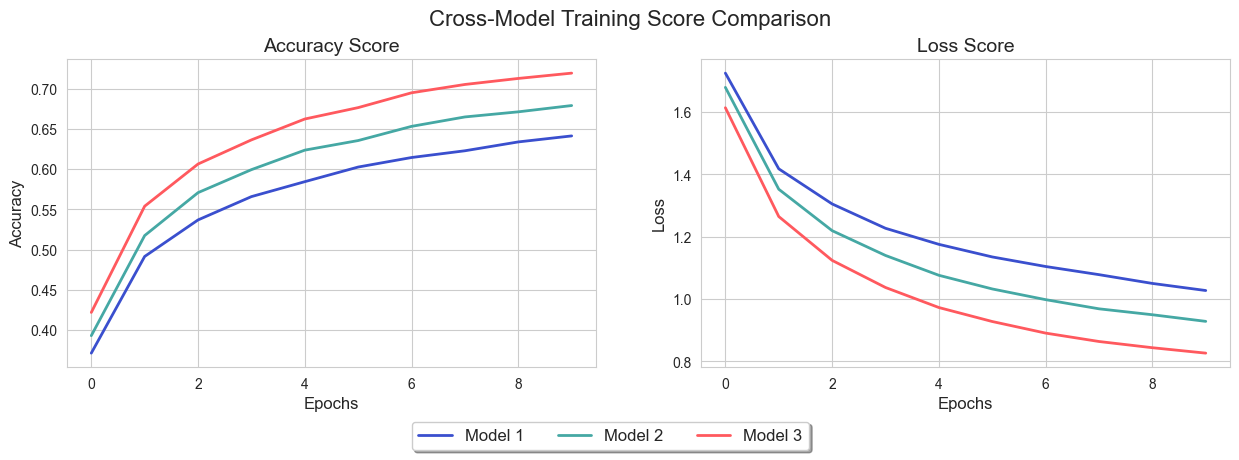

In [15]:
# Initialize subplot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 4))

# Plot accuracy score
i = 0
for model in models:
    ax1.plot(epochs, model.history["accuracy"], color=colors[i], linewidth=2)
    i += 1
    
# Plot loss score
i = 0
for model in models:
    ax2.plot(epochs, model.history["loss"], label=labels[i], color=colors[i], linewidth=2)
    i += 1

# Accuracy plot attributes
ax1.set_title("Accuracy Score", fontsize = 14)
ax1.set_xlabel("Epochs", fontsize=12)
ax1.set_ylabel("Accuracy", fontsize=12)

# Loss plot attributes
ax2.set_title("Loss Score", fontsize = 14)
ax2.set_xlabel("Epochs", fontsize=12)
ax2.set_ylabel("Loss", fontsize=12)
ax2.legend(ncol=3, bbox_to_anchor=(-0.28, -0.65, 0.5, 0.5), fontsize = 12, shadow=True)

# Subplots title
plt.suptitle("Cross-Model Training Score Comparison", fontsize=16, y=1.005);

### Validation Score Comparison

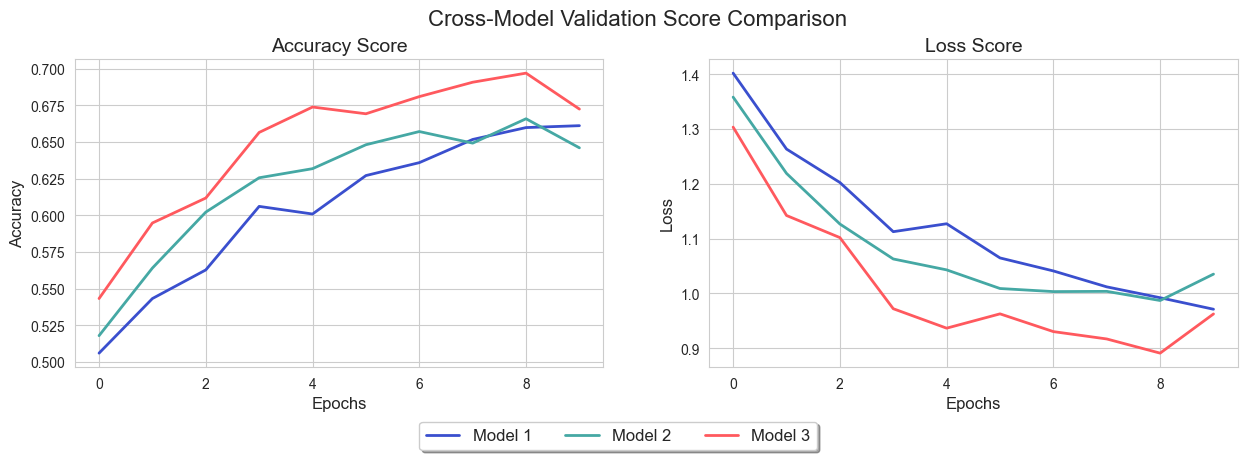

In [16]:
# Initialize subplot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 4))

# Plot accuracy score
i = 0
for model in models:
    ax1.plot(epochs, model.history["val_accuracy"], color=colors[i], linewidth=2)
    i += 1
    
# Plot loss score
i = 0
for model in models:
    ax2.plot(epochs, model.history["val_loss"], label=labels[i], color=colors[i], linewidth=2)
    i += 1

# Accuracy plot attributes
ax1.set_title("Accuracy Score", fontsize = 14)
ax1.set_xlabel("Epochs", fontsize=12)
ax1.set_ylabel("Accuracy", fontsize=12)

# Loss plot attributes
ax2.set_title("Loss Score", fontsize = 14)
ax2.set_xlabel("Epochs", fontsize=12)
ax2.set_ylabel("Loss", fontsize=12)
ax2.legend(ncol=3, bbox_to_anchor=(-0.28, -0.65, 0.5, 0.5), fontsize = 12, shadow=True)

# Subplots title
plt.suptitle("Cross-Model Validation Score Comparison", fontsize=16, y=1.005);

## Model Tuning

We will compare the performance of the third model `M3` with three different optimizers. The first being the RMSprop optimizer that we used already, and the other two being Stochastic Gradient Descent (SGD) and Adam.

In [17]:
# Initialize SGD optimizer
SGD_optim = keras.optimizers.SGD(learning_rate=learning_rate)

# Train model using SGD
M3_SGD = M3
M3_SGD.compile(loss="categorical_crossentropy", optimizer=SGD_optim, metrics=["accuracy"])

# Train for 10 epochs
M3_SGD_fit = M3_SGD.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=n_epochs,
    validation_data=(x_test, y_test),
    shuffle=True,
)

Epoch 1/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7586 - loss: 0.6972 - val_accuracy: 0.7125 - val_loss: 0.8547
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.7682 - loss: 0.6749 - val_accuracy: 0.7109 - val_loss: 0.8532
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.7697 - loss: 0.6688 - val_accuracy: 0.7110 - val_loss: 0.8506
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.7710 - loss: 0.6685 - val_accuracy: 0.7157 - val_loss: 0.8539
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.7761 - loss: 0.6565 - val_accuracy: 0.7179 - val_loss: 0.8452
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.7737 - loss: 0.6619 - val_accuracy: 0.7169 - val_loss: 0.8461
Epoch 7/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.7738 - loss: 0.6569 - val_accuracy: 0.7148 - val_loss: 0.8400
Epoch 8/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.7813 - loss: 0.6464 - 

In [18]:
# Initialize Adam optimizer
Adam_optim = keras.optimizers.Adam(learning_rate=learning_rate)
# Train model using Adam
M3_Adam = M3
M3_Adam.compile(loss="categorical_crossentropy", optimizer=Adam_optim, metrics=["accuracy"])

# Train for 10 epochs
M3_Adam_fit = M3_Adam.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=n_epochs,
    validation_data=(x_test, y_test),
    shuffle=True,
)

Epoch 1/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - accuracy: 0.7401 - loss: 0.7575 - val_accuracy: 0.7092 - val_loss: 0.8510
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 12s 10ms/step - accuracy: 0.7591 - loss: 0.6985 - val_accuracy: 0.7159 - val_loss: 0.8416
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.7766 - loss: 0.6420 - val_accuracy: 0.7059 - val_loss: 0.8645
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.7868 - loss: 0.6097 - val_accuracy: 0.7167 - val_loss: 0.8307
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.7990 - loss: 0.5754 - val_accuracy: 0.7211 - val_loss: 0.8250
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 12s 10ms/step - accuracy: 0.8137 - loss: 0.5383 - val_accuracy: 0.7163 - val_loss: 0.8474
Epoch 7/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.8216 - loss: 0.5069 - val_accuracy: 0.7234 - val_loss: 0.8297
Epoch 8/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.8344 - loss

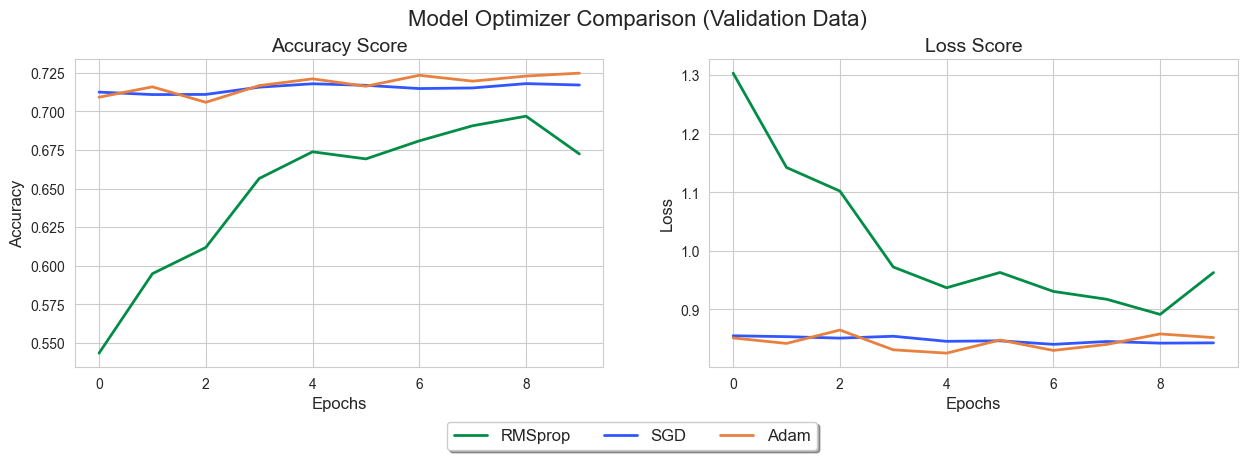

In [19]:
# Re-initialize RMSprop optimizer for comparison
RMS_optim = keras.optimizers.RMSprop(learning_rate=learning_rate)

# Create optimizer, labels, and color lists
optims = [RMS_optim, SGD_optim, Adam_optim]
models = [M3_fit, M3_SGD_fit, M3_Adam_fit]
labels = ["RMSprop", "SGD", "Adam"]
colors = ["#028D47", "#3156ff", "#e8803f"]

# Initialize subplot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 4))

# Plot accuracy score
i = 0
for optim in optims:
    ax1.plot(epochs, models[i].history["val_accuracy"], color=colors[i], linewidth=2)
    i += 1
    
# Plot loss score
i = 0
for optim in optims:
    ax2.plot(epochs, models[i].history["val_loss"], label=labels[i], color=colors[i], linewidth=2)
    i += 1

# Accuracy plot attributes
ax1.set_title("Accuracy Score", fontsize = 14)
ax1.set_xlabel("Epochs", fontsize=12)
ax1.set_ylabel("Accuracy", fontsize=12)

# Loss plot attributes
ax2.set_title("Loss Score", fontsize = 14)
ax2.set_xlabel("Epochs", fontsize=12)
ax2.set_ylabel("Loss", fontsize=12)
ax2.legend(ncol=3, bbox_to_anchor=(-0.28, -0.65, 0.5, 0.5), fontsize = 12, shadow=True)

# Subplots title
plt.suptitle("Model Optimizer Comparison (Validation Data)", fontsize=16, y=1.005);

It is evident in the figure above that the RMSprop optimizer yields the lowest performance in terms of accuracy and loss; however, the SGD and Adam optimizers are comparable with the Adam optimizer only slightly outperforming SGD. 

---
## Discussion

The three models we compared all share the same general structure; only differing in their depth by changing the number of filters in the second Conv2D layer. Therefore, we can effectively assess the effect of increasing model depth with the results yielded. Depth and accuracy score increases from models `M1` → `M2` → `M3`, while loss score decreases. As such, we can conclude that within the range of parameters compared, model performance increases with increasing depth. 

As all models are equal in terms of their explainability, the final recommended model from this comparison is `M3`, trained with the Adam optimizer. Hyperparameter tuning is still necessary to improve this model, as the model scores suggest the that `M3` is the most overfit of the three models compared. It would also be ideal to experiment with different clsutering techniques and model structures entirely, as it is possible they yield improved results. 